In [2]:
import matplotlib.pyplot as plt
import yfinance as yf
from fbprophet import Prophet

In [3]:
df = yf.download('BTC-USD', start='2019-12-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-30,7764.057129,7836.102051,7515.849609,7569.629883,7569.629883,17158194786
2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479
2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706
2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769
2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918
...,...,...,...,...,...,...
2022-01-09,41734.726562,42663.949219,41338.160156,41911.601562,41911.601562,21294384372
2022-01-10,41910.230469,42199.484375,39796.570312,41821.261719,41821.261719,32104232331
2022-01-11,41819.507812,43001.156250,41407.753906,42735.855469,42735.855469,26327648900


In [5]:
df = df.reset_index()

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,7764.057129,7836.102051,7515.849609,7569.629883,7569.629883,17158194786
1,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479
2,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706
3,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769
4,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918
...,...,...,...,...,...,...,...
771,2022-01-09,41734.726562,42663.949219,41338.160156,41911.601562,41911.601562,21294384372
772,2022-01-10,41910.230469,42199.484375,39796.570312,41821.261719,41821.261719,32104232331
773,2022-01-11,41819.507812,43001.156250,41407.753906,42735.855469,42735.855469,26327648900
774,2022-01-12,42742.179688,44135.367188,42528.988281,43949.101562,43949.101562,33499938689


In [7]:
df[['ds', 'y']] = df[['Date', 'Adj Close']]

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2019-11-30,7764.057129,7836.102051,7515.849609,7569.629883,7569.629883,17158194786,2019-11-30,7569.629883
1,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479,2019-12-01,7424.292480
2,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706,2019-12-02,7321.988281
3,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769,2019-12-03,7320.145508
4,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918,2019-12-04,7252.034668
...,...,...,...,...,...,...,...,...,...
771,2022-01-09,41734.726562,42663.949219,41338.160156,41911.601562,41911.601562,21294384372,2022-01-09,41911.601562
772,2022-01-10,41910.230469,42199.484375,39796.570312,41821.261719,41821.261719,32104232331,2022-01-10,41821.261719
773,2022-01-11,41819.507812,43001.156250,41407.753906,42735.855469,42735.855469,26327648900,2022-01-11,42735.855469
774,2022-01-12,42742.179688,44135.367188,42528.988281,43949.101562,43949.101562,33499938689,2022-01-12,43949.101562


In [9]:
model = Prophet()

In [11]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -14.242


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1578.22    0.00453114       193.526           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1631.5     0.0667109       312.992           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1673.5     0.0185148       473.678           1           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     377       1695.97   0.000336397       220.065   1.609e-06       0.001      512  LS failed, Hessian reset 
     399       1700.18    0.00897659       1046.85     0.02302           1      539   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1709.05    0.00214676       70.2051           1           1      6

In [12]:
future = model.make_future_dataframe(365)

In [13]:
forecast = model.predict(future)

In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-30,659.124557,7078.934966,13472.027437,659.124557,659.124557,9807.308682,9807.308682,9807.308682,33.035802,33.035802,33.035802,9774.272880,9774.272880,9774.272880,0.0,0.0,0.0,10466.433239
1,2019-12-01,722.683453,6573.204698,13518.519923,722.683453,722.683453,9308.414148,9308.414148,9308.414148,22.523110,22.523110,22.523110,9285.891038,9285.891038,9285.891038,0.0,0.0,0.0,10031.097601
2,2019-12-02,786.242350,6268.814947,12823.664271,786.242350,786.242350,8800.999216,8800.999216,8800.999216,2.711269,2.711269,2.711269,8798.287947,8798.287947,8798.287947,0.0,0.0,0.0,9587.241566
3,2019-12-03,849.801247,5844.417814,12405.970505,849.801247,849.801247,8225.442270,8225.442270,8225.442270,-90.363740,-90.363740,-90.363740,8315.806010,8315.806010,8315.806010,0.0,0.0,0.0,9075.243517
4,2019-12-04,913.360143,5320.190617,12255.020608,913.360143,913.360143,7886.144872,7886.144872,7886.144872,43.291372,43.291372,43.291372,7842.853500,7842.853500,7842.853500,0.0,0.0,0.0,8799.505015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2023-01-09,29510.342681,-57557.478552,115265.463120,-61583.197304,109765.663206,5597.097677,5597.097677,5597.097677,2.711269,2.711269,2.711269,5594.386409,5594.386409,5594.386409,0.0,0.0,0.0,35107.440359
1137,2023-01-10,29474.963007,-57344.280788,114929.347487,-61786.707942,110130.732116,5327.038797,5327.038797,5327.038797,-90.363740,-90.363740,-90.363740,5417.402537,5417.402537,5417.402537,0.0,0.0,0.0,34802.001804
1138,2023-01-11,29439.583333,-57371.997967,114846.864620,-61990.218580,110495.801026,5257.845334,5257.845334,5257.845334,43.291372,43.291372,43.291372,5214.553962,5214.553962,5214.553962,0.0,0.0,0.0,34697.428667
1139,2023-01-12,29404.203659,-58292.336442,117078.371292,-62193.729218,110829.942871,4942.957028,4942.957028,4942.957028,-46.145219,-46.145219,-46.145219,4989.102246,4989.102246,4989.102246,0.0,0.0,0.0,34347.160687


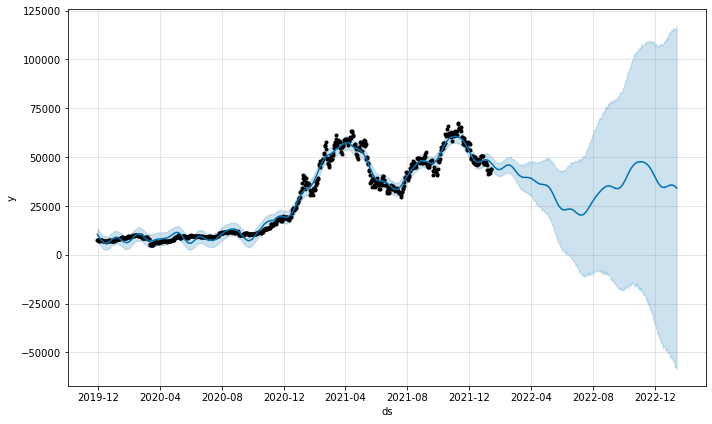

In [15]:
model.plot(forecast)
plt.show()